In [5]:
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime

UsageError: Line magic function `%install_ext` not found.


In [6]:
import mlxtend
import numpy as np
import pandas as pd
import re

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import time
from functools import wraps

from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import k_means_

from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity, cosine_distances

from sklearn.decomposition import PCA

from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.metrics import silhouette_score
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [8]:
# k_means_.euclidean_distances = cosine_distances

# Importando o dataset

dataset depois do tratamento feito para a análise de Market Basket. 

In [9]:
ratingsDF = pd.read_pickle("..\\ProcessedData\\df.pkl")

In [10]:
ratingsDF.head()

,uid,id,rating,timestamp,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,1997-12-04 15:55:49,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,1997-10-01 23:06:30,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,1998-01-04 04:37:51,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,1997-11-10 05:03:55,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,1997-10-10 17:16:33,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
print("Número de usuários na base %i" % ratingsDF['uid'].nunique())

Número de usuários na base 943


In [12]:
print("Número de filmes na base %i" % ratingsDF['id'].nunique())

Número de filmes na base 1664


## Criando os vetores de features dos filmes

Cada filme será representado pelas notas que cada um dos usuários da base deu para aquele filme. O que siginifica que **cada filme será representado por vetores esparsos de tamanho 943**.

Sabemos da exploração que não há duplicatas para a chave **uid, id**, então:

In [13]:
ratings_id = ratingsDF.groupby(['id']).aggregate({'rating': len})

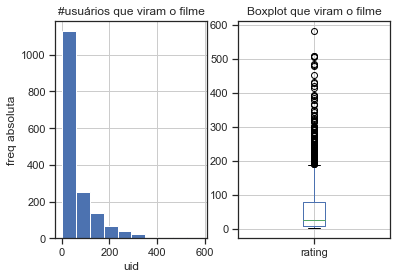

In [14]:
plt.figure(),
plt.subplot(1,2,1)
ratings_id.rating.hist()
plt.grid(True)
plt.title("#usuários que viram o filme")
plt.xlabel("uid")
plt.ylabel("freq absoluta")

plt.subplot(1,2,2)
ratings_id.boxplot()
plt.title("Boxplot que viram o filme")
plt.show()

In [15]:
print("Moda do número de usuários que viram o filme: %i" % ratings_id.rating.mode())

Moda do número de usuários que viram o filme: 1


In [16]:
print("Número de filmes com apenas uma avaliação: %i" % (ratings_id.rating == 1).sum())

Número de filmes com apenas uma avaliação: 135


## Criando a versão pivoteada do dataset

In [160]:
def collapse_columns(df):
    df = df.copy()
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.to_series().str.join('')
    return df

In [179]:
%%time
df_pivoted = pd.pivot_table(ratingsDF, columns=['uid'], values=['rating'], index=['id'], aggfunc=np.max)

Wall time: 1min 10s


In [156]:
# df_pivoted.fillna(0, inplace=True)

In [181]:
type(df_pivoted.index)

pandas.core.indexes.numeric.Int64Index

In [182]:
df_pivoted.index.get_level_values(0)

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1681, 1682],
           dtype='int64', name='id', length=1664)

In [183]:
df_flattern = df_pivoted.copy()
df_flattern.columns = df_pivoted.columns.get_level_values(1)

In [186]:
df_flattern.head(10)

uid,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
2,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.0,NaN,NaN,NaN,NaN,2.0,5.0,3.0,4.0,4.0,...,NaN,NaN,4.0,NaN,4.0,NaN,4.0,4.0,NaN,NaN
8,1.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
9,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,4.0,...,NaN,1.0,4.0,5.0,3.0,5.0,3.0,NaN,NaN,3.0


### Dormato Esparso do dataset

o dataset pode ser codificado de forma esparsa antes do fill de NaN pelas médias, talvez gere ganho

In [187]:
df_pivoted_spase = df_flattern.to_sparse()

## Fill de valores nulos

Os algoritimos que vamos utilizar são sensíveis aos valores nulos. Para diminuir esse efeito, podemos substituir zeros pela média das notas dos filmes desconsiderando os valores 0 (que são NAN na verdade);

In [198]:
filmMeanRating = df_pivoted.mean(axis=1)

> Obs: a função fill na por linha não está implementada no Pandas, por isso as transposições

In [199]:
df_flattern = df_flattern.T.fillna(filmMeanRating).T

In [200]:
df_flattern.T.describe()

id,1,2,3,4,5,6,7,8,9,10,...,1672,1673,1674,1675,1676,1677,1678,1679,1681,1682
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,...,943.0,943.0,943.0,943.0,943.0,943.0,943.0,943.0,943.0,943.0
mean,3.528312,3.057335,3.500906,3.357271,3.551880,3.792361,3.913557,3.919339,3.852026,3.845948,...,2.0,3.0,4.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0
std,0.724645,0.363987,0.402556,0.465042,0.295100,0.215107,0.640101,0.483976,0.587055,0.309942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.0,3.0,4.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0
25%,3.206107,3.033333,3.550239,3.302326,3.576923,3.798469,3.995434,3.896321,3.831461,3.847458,...,2.0,3.0,4.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0
50%,3.206107,3.033333,3.550239,3.302326,3.576923,3.798469,3.995434,3.896321,3.831461,3.847458,...,2.0,3.0,4.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0
75%,4.000000,3.033333,3.550239,3.302326,3.576923,3.798469,4.000000,3.896321,3.831461,3.847458,...,2.0,3.0,4.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,2.0,3.0,4.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0


In [201]:
df_flattern.to_pickle('films_features.pkl')

## Decomposição do vetor de features

### PCA

In [202]:
pca_dim = 943

In [203]:
pca = PCA(n_components=pca_dim).fit(df_flattern)

In [204]:
cumulativeVar = pd.Series(pca.explained_variance_ratio_.cumsum())

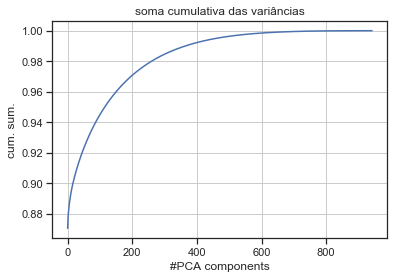

In [205]:
plt.figure(),
cumulativeVar.plot()
plt.grid(True)
plt.title("soma cumulativa das variâncias")
plt.xlabel("#PCA components")
plt.ylabel("cum. sum.")
plt.show()

a variância ao longo das 5 primeiras dimensões já é da ordem de **e-5**. Se reduzirmos o número de dimensões para apenas 2 temos:

In [206]:
pca_dim = 3
pca = PCA(n_components=pca_dim).fit(df_flattern)

In [207]:
print("energia conservada pelas %i primeiras componentes do PCA %f" % (pca_dim, pca.explained_variance_ratio_.sum())) 

energia conservada pelas 3 primeiras componentes do PCA 0.880170


In [209]:
df_pca = pd.DataFrame(pca.transform(df_flattern))

Data Scatter

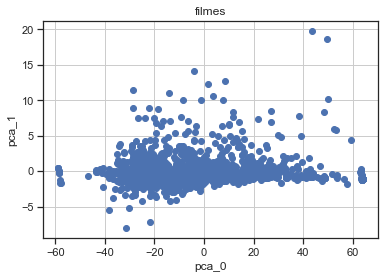

In [210]:
# plt.figure().gca(projection='3d')
plt.figure()
# plt.scatter(df_pca[0], df_pca[1], df_pca[2])
plt.scatter(df_pca[0], df_pca[1])
plt.grid(True)
plt.title("filmes")
plt.xlabel("pca_0")
plt.ylabel("pca_1")
plt.show()

## Clusterização

Posdemos executar a clusterização no espaço não transformado pelo PCA enquanto isso não gerar problemas de desempenho. Pode-se usar o PCA para fazer a projeção para 2D e faciliar a visualização dos clustes

In [211]:
# %%time
# plot_learning_curve(
#     estimator=kmeans, # clustering algorithm
#     X=df_pivoted,y=None, # None for unsupervisioned
#     train_sizes=(1.0,), # all for training
#     cv=10, #cross-validation maninfolds    
#     title="kmeans learning"
# )

### Kmeans usando a norma L2 como medida de dessimilaridade

Primeiro devemos determinar o número de clusters

#### Trenamento

Para determinar o número de clusters, procuramos por um joelho na gráfico de loss (norma L@) vs número de clusters

In [212]:
th_min = 0
th_max = 2
n_clusters_range = np.rint(np.logspace(th_min,th_max,num=30))

In [213]:
scores = []
time_elapsed = []

In [214]:
df_for_clustering = df_pca

In [215]:
%%time
for n in n_clusters_range:
    start_time = time.time()
    kmeans = KMeans(n_clusters=int(n)).fit(df_for_clustering)
    elapsed_time = time.time() - start_time
    scores.append(kmeans.inertia_)
    time_elapsed.append(elapsed_time)

Wall time: 5.1 s


A inércia dividida pelo número de pontos na base dá a noção da distância média entre os pontos e seus clusters, que é uma quantidade mais intuitiva

In [216]:
scores = np.array(scores)/len(df_for_clustering)

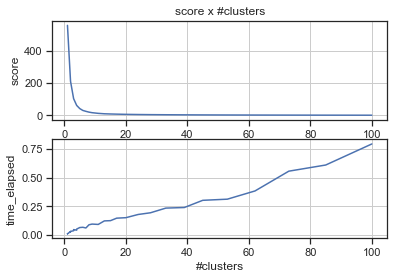

In [217]:
plt.figure(),
plt.subplot(2,1,1)
plt.plot( n_clusters_range, scores)
plt.grid(True)
plt.title("score x #clusters")
plt.ylabel("score")
plt.subplot(2,1,2)
plt.plot( n_clusters_range, time_elapsed)
plt.grid(True)
plt.xlabel("#clusters")
plt.ylabel("time_elapsed")
plt.show()

In [218]:
#Scaling of data
# ss = StandardScaler()
# ss.fit_transform(df_pivoted_sparse)

clust_labels = kmeans.labels_

Por inspeção, há um joelho entre 10 e 20, vou repetir a análise para aumentar o range de 10 a 20

In [219]:
n_clusters_range2 = np.linspace(5,20,num=10)

In [220]:
scores2 = []
time_elapsed2 = []

In [221]:
%%time
for n in n_clusters_range2:
    start_time = time.time()
    kmeans = KMeans(n_clusters=int(n)).fit(df_for_clustering)
    elapsed_time = time.time() - start_time
    scores2.append(kmeans.inertia_)
    time_elapsed2.append(elapsed_time)

Wall time: 1.04 s


A inércia dividida pelo número de pontos na base dá a noção da distância média entre os pontos e seus clusters, que é uma quantidade mais intuitiva

In [226]:
scores2 = np.array(scores2)/len(df_for_clustering)

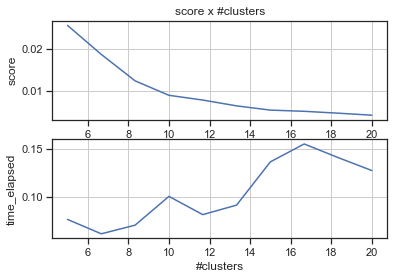

In [227]:
plt.figure(),
plt.subplot(2,1,1)
plt.plot( n_clusters_range2, scores2)
plt.grid(True)
plt.title("score x #clusters")
plt.ylabel("score")
plt.subplot(2,1,2)
plt.plot( n_clusters_range2, time_elapsed2)
plt.grid(True)
plt.xlabel("#clusters")
plt.ylabel("time_elapsed")
plt.show()

Por inspeção n=10, parece uma boa definição para o joelho

In [228]:
n_ = 10
kmeans = KMeans(n_clusters=n_).fit(df_for_clustering)

In [229]:
clust_labels = kmeans.labels_

In [231]:
df = df_for_clustering.copy()
df['cluster'] = clust_labels

In [232]:
filmsInClusterCount = pd.Series(data=df.groupby(['cluster']).count()[0])

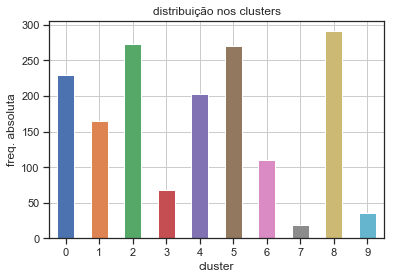

In [233]:
plt.figure(),
filmsInClusterCount.plot.bar(x='index', y='cluster', rot=0)
plt.xlabel("cluster")
plt.grid(True)
plt.ylabel("freq. absoluta")
plt.title('distribuição nos clusters')
plt.show()

#### Visualizando so resultados

com os clusters treinados, podemos prosseguir com a análise e tentar descobrir se são relevantes

<Figure size 432x288 with 0 Axes>

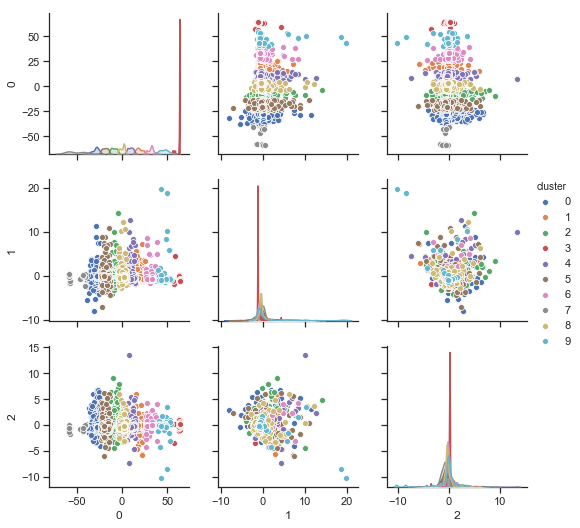

In [236]:
plt.figure(),
g = sns.pairplot( df, hue="cluster", x_vars=df_pca.columns, y_vars=df_pca.columns)
plt.show()

##### Conclusões
> Aparentemente, os clusters usados separaram os dados (para a maioria dos clusters), com planos ortogonais ao eixo 0 do PCA.

In [237]:
to_enrich = ratingsDF.groupby('id').agg(
    {'timestamp':'first', 
     'movie_title':'first', 
     'release_date':'first',
     'unknown':'first', 
     'Action':'first', 
     'Adventure':'first', 
     'Animation':'first', 
     'Children\'s':'first',
       'Comedy':'first', 
     'Crime':'first', 
     'Documentary':'first', 
     'Drama':'first', 
     'Fantasy':'first', 
     'Film-Noir':'first',
       'Horror':'first', 
     'Musical':'first', 
     'Mystery':'first', 
     'Romance':'first', 
     'Sci-Fi':'first', 
     'Thriller':'first', 
     'War':'first',
    'Western':'first'
    })

In [238]:
df_full = pd.concat([df, to_enrich], axis=1, join='inner')

In [239]:
df_full[df_full['cluster'] == 0].head(10)
df_full = df_full.rename(mapper={0:'pca_0', 1:'pca_1', 2:'pca_2'}, axis='columns')

In [240]:
df_full.head(10)

,pca_0,pca_1,pca_2,cluster,timestamp,movie_title,release_date,unknown,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,0.769144,1.410609,2.793238,8,1998-02-17 17:28:52,Toy Story (1995),1995-01-01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-12.877952,-1.373894,1.684576,2,1997-09-30 16:14:13,GoldenEye (1995),1995-01-01,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,-8.420553,3.566946,-0.004996,2,1997-11-08 04:30:41,Four Rooms (1995),1995-01-01,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-14.426387,-1.160718,2.175221,5,1998-02-03 15:18:17,Get Shorty (1995),1995-01-01,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,-21.762473,-0.148603,-0.250092,5,1998-03-03 06:29:36,Copycat (1995),1995-01-01,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,-25.574053,1.297948,1.359630,0,1997-10-01 23:10:39,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,1995-01-01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-25.703121,2.036594,0.216636,0,1997-10-29 01:48:36,Twelve Monkeys (1995),1995-01-01,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,-23.641312,2.339577,-2.859291,5,1997-11-26 19:30:42,Babe (1995),1995-01-01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,-23.416556,-0.027299,-1.094761,5,1998-01-09 00:05:28,Dead Man Walking (1995),1995-01-01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,-35.990019,-2.473212,3.302469,0,1997-11-14 16:28:41,Richard III (1995),1996-01-22,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Intra cluster coesion

In [ ]:
intra cluster_dist = []
for ()
euclidean_distances()

In [270]:
in_cluster[["pca_0","pca_1","pca_2"]].shape

(226, 3)

In [273]:
    in_cluster = df_full[df_full.cluster == 0]
    centroid = np.array(kmeans.cluster_centers_[0]).reshape(1,-1)
    euclidean_distances(in_cluster[["pca_0","pca_1","pca_2"]], centroid).sum()

842.5599453045197

In [302]:
intra_cluster_dist = []
for c in range(0, n_):
    in_cluster = df_full[df_full.cluster == c]
    centroid = np.array(kmeans.cluster_centers_[c]).reshape(1,-1)
    dist = euclidean_distances(in_cluster[["pca_0","pca_1","pca_2"]], centroid).mean()
    cluster_sz = len(in_cluster)
    intra_cluster_dist.append([c,dist,cluster_sz])
intra_cluster_dist = pd.DataFrame(columns=['cluster', 'mean_dist', 'cluster_sz'], data=intra_cluster_dist)

Os clusters em ordem de coesão

In [303]:
intra_cluster_dist.sort_values(['mean_dist'])

,cluster,mean_dist,cluster_sz
3,3,0.828349,68
8,8,2.692573,286
4,4,3.115061,202
1,1,3.238256,163
6,6,3.254297,108
5,5,3.267820,269
2,2,3.328162,270
0,0,3.728141,226
9,9,5.658004,36
7,7,7.860477,18


**Conclusão**
> os clusters 9 e 7 são pequenos e pouco coesos, o que pode significar que não sejam clusters de fato, mas apenas 'outliers'

In [244]:
for c in range(0, n_):
    in_cluster = df_full[df_full.cluster == c]
    print("Cluster %i" % c)
    print(in_cluster.sample(n=10)['movie_title'])
    in_cluster.to_csv("cluster_%i.csv" % c)
    clusters_samples[c] = in_cluster

Cluster 0
643                 The Innocent (1994)
693                       Casino (1995)
122               Cable Guy, The (1996)
281              River Wild, The (1994)
172     Empire Strikes Back, The (1980)
180               Apocalypse Now (1979)
207           Cyrano de Bergerac (1990)
1247                   Bad Girls (1994)
1429               Sliding Doors (1998)
21        Muppet Treasure Island (1996)
Name: movie_title, dtype: object
Cluster 1
1324                                     Loaded (1994)
1299                             Penny Serenade (1941)
1068    Star Maker, The (Uomo delle stelle, L') (1995)
712                                     Tin Men (1987)
812                                       Andre (1994)
1273                             Color of Night (1994)
1433                               Men of Means (1998)
965                                  Funny Face (1957)
968                      Inspector General, The (1949)
1282                            Grass Harp, The (199

### DBScan usando a norma L2 como medida de dessimilaridade

Primeiro devemos determinar o número de clusters

In [63]:
th_min = 3
th_max = 40
n_minSamples_range = np.rint(np.linspace(th_min,th_max,num=30))

A determinação do valor de eps é difícil já que a distância entre vetores de notas de filmeas não faz sentido físico. Vou utilizar um valor a partir da primssa que se alguém, pra 10 filmes, dá notas com máxima discordância, isto é, um deu 5 o outro 1, isso daria uma distância no espao de 40.

In [64]:
scores = []
time_elapsed = []

In [65]:
eps_ = 40

In [66]:
df_pivoted.values.shape

(1664, 943)

Exemplo fornecido pela documentação do SKlearn da classse DBSCAN

```python
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_
```